In [1]:
###############
### IMPORTS ###
###############

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

The CSV titled 'dataframe_merged.csv' is too large. If you would like to re-run this notebook to see how it works, replace it with the smaller dataframe: 'dataframe_merged_small.csv'. The merged dataframe is generated from the previous notebook '1_Data.ipynb'.

### EDA

In [2]:
df_all = pd.read_csv('data/dataframe_merged.csv')

In [3]:
print('Shape of dataframe: ', df_all.shape)
print('Columns of dataframe: ', df_all.columns)

Shape of dataframe:  (46628, 28)
Columns of dataframe:  Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'director'],
      dtype='object')


In [4]:
df_all.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"['Animation', 'Comedy', 'Family']",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","['jealousy', 'toy', 'boy', 'friendship', 'frie...",John Lasseter
1,False,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","['board game', 'disappearance', ""based on chil...",Joe Johnston


In [79]:
df_all[df_all['title']=='The Avengers'].keywords.values

array(["['london england', 'weather manipulation', 'wretch']",
       "['new york', 'shield', 'marvel comic', 'superhero', 'based on comic']"],
      dtype=object)

In [5]:
# Created a weighted rating column using vote_count and vote_average
# This weighted rating column will be used to truncate the data set
'''
weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:
R = average for the movie (mean) = (Rating)
v = number of votes for the movie = (votes)
m = minimum votes required to be listed in the Top 250 (currently 25000)
'''
C = df_all['vote_average'].mean()
m = df_all['vote_count'].quantile(0.80)
print('Average rating across all movies (C): ', C)
print('Minimum votes to be listed in top 250 (m): ', m)

Average rating across all movies (C):  5.6117278654770075
Minimum votes to be listed in top 250 (m):  49.0


In [6]:
# Calculate the weighted_rating for all movies
df_all['weighted_rating'] = df_all.apply(lambda x: ((x['vote_count'] / (x['vote_count'] + m)) * x['vote_average'] + \
                                                    (m / (x['vote_count'] + m)) * C), axis=1)


In [7]:
print('Minimum weighted rating: ', df_all['weighted_rating'].min())
print('Average weighted rating: ', df_all['weighted_rating'].mean())
print('Maximum weighted rating: ', df_all['weighted_rating'].max(), '\n')
print('Shape of df_all (without removing data): ', df_all.shape)

Minimum weighted rating:  2.569856686059564
Average weighted rating:  5.7771210991340824
Maximum weighted rating:  8.859260092124469 

Shape of df_all (without removing data):  (46628, 29)


In [8]:
# Only keep the 80th percentile of movie
df = df_all[df_all['vote_average'] > 0]

In [9]:
df = df[df['weighted_rating'] > df['weighted_rating'].quantile(0.1)]

In [10]:
df_all['weighted_rating'].quantile(0.05)

5.3157204098124735

In [11]:
print('Minimum weighted rating: ', df['weighted_rating'].min())
print('Average weighted rating: ', df['weighted_rating'].mean())
print('Maximum weighted rating: ', df['weighted_rating'].max(), '\n')
print('Shape of df_all (without removing data): ', df.shape)

Minimum weighted rating:  5.444100617060126
Average weighted rating:  5.852964493667085
Maximum weighted rating:  8.859260092124469 

Shape of df_all (without removing data):  (39133, 29)


In [12]:
# Create a small dataset that contains ~90% of the top weighted rated movies for use in the app
# df.to_csv('data/dataframe_merged_filter.csv', index=False)

In [13]:
# Create a small dataset that contains ~25% of the top weighted rated movies for use in the app
# df.to_csv('data/dataframe_merged_small.csv', index=False)

In [14]:
# bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

In [15]:
df_all_groupby_votes = pd.DataFrame(df_all['vote_average'].value_counts().reset_index()).rename(columns={"index":"vote_average", "vote_average": "counts"}).sort_values(by='vote_average').reset_index()
print('Value counts of scored from df_all:')
df_all_groupby_votes

Value counts of scored from df_all:


,index,vote_average,counts
0,0,0.0,3121
1,77,0.5,14
2,89,0.7,1
3,57,1.0,107
4,91,1.1,1
...,...,...,...
87,87,9.4,3
88,74,9.5,18
89,88,9.6,1
90,90,9.8,1


In [16]:
df_groupby_votes = pd.DataFrame(df['vote_average'].value_counts().reset_index()).rename(columns={"index":"vote_average", "vote_average": "counts"}).sort_values(by='vote_average').reset_index()
print('Value counts of scored from df (removing vote_average=0 and bottom 10th percentile):')
df_groupby_votes

Value counts of scored from df (removing vote_average=0 and bottom 10th percentile):


,index,vote_average,counts
0,67,0.5,11
1,50,1.0,85
2,59,1.5,28
3,73,1.8,3
4,48,2.0,98
...,...,...,...
71,70,9.4,3
72,64,9.5,18
73,74,9.6,1
74,75,9.8,1


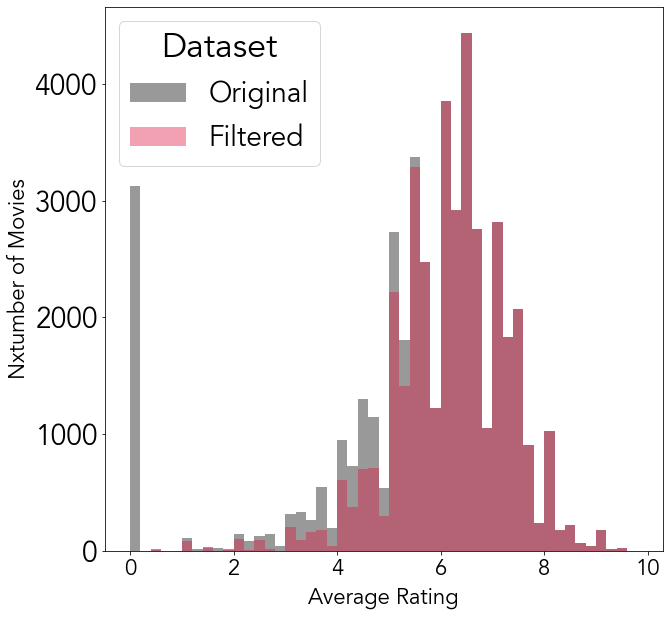

In [80]:
fig = plt.figure(figsize=(10, 10))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)

binning = np.arange(0, 10, 0.2)

ax3 = sns.distplot(df_all['vote_average'], color = 'black', kde=False, bins=binning)
sns.distplot(df['vote_average'], color = 'crimson', kde=False, bins=binning, ax=ax3)


# Axes properties and labels
ax3.set_xlabel('Average Rating', fontdict=font, fontsize = 22)
ax3.set_ylabel('Nxtumber of Movies', fontdict=font, fontsize = 22)

# Background colors
# ax3.patch.set_facecolor('xkcd:off white')
# fig.set_facecolor('xkcd:light blue grey')
# fig.patch.set_alpha(0.3)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)

plt.legend(['Original', 'Filtered'],
           title = 'Dataset',
           title_fontsize = 34,
           markerscale = 3,
           fontsize = 28,
           loc = 0)


plt.savefig('figures/average_rating_distribution.png', bbox_inches = 'tight', dpi = 300)

# This line shows how to include a facecolor to the plot
# plt.savefig('figures/average_rating_distribution.png', bbox_inches = 'tight', dpi = 300,
#            facecolor=fig.get_facecolor())

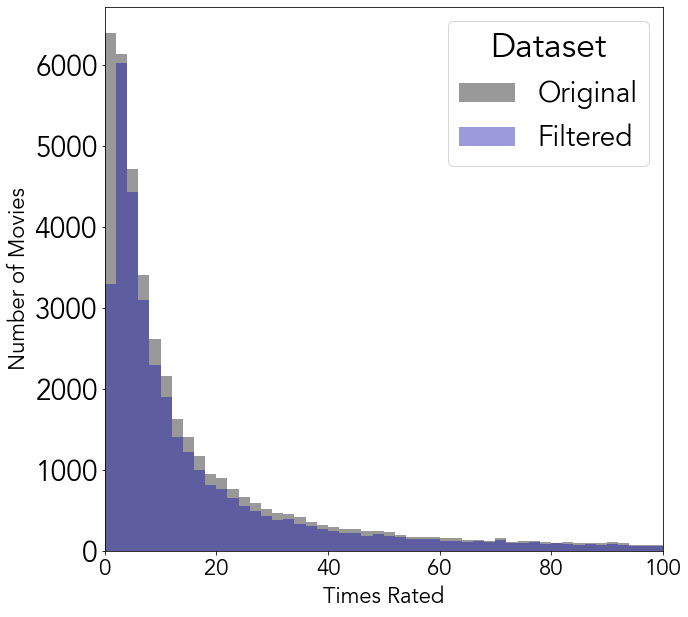

In [86]:
fig = plt.figure(figsize=(10, 10))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)

binning = np.arange(0, 1000, 2)

ax4 = sns.distplot(df_all['vote_count'], color = 'black', kde=False, bins=binning)
sns.distplot(df['vote_count'], color = '#0504aa', kde=False, bins=binning, ax=ax4)


# Axes properties and labels
ax4.set_xlabel('Times Rated', fontdict=font, fontsize = 22)
ax4.set_ylabel('Number of Movies', fontdict=font, fontsize = 22)

ax4.set_yscale('linear')
ax4.set_xlim([0, 100])
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)


# Background color
# ax4.patch.set_facecolor('xkcd:light grey')
# fig.set_facecolor('xkcd:light grey')


# ax14 = plt.axes([0.5, 0.5, 0.3, 0.3])
# ax14.set_xlabel('', fontdict=font, fontsize = 22)
# ax14.set_ylabel('', fontdict=font, fontsize='xx-large')
# sns.distplot(df_all['vote_count'], color = 'black', ax=ax14)
# sns.distplot(df['vote_count'], color = '#0a888a', ax=ax14)
# ax14.set_xlim([1, 100])
# ax14.set(ylim=(0, 3))
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 22)
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=4)

plt.legend(['Original', 'Filtered'],
           title = 'Dataset',
           title_fontsize = 34,
           markerscale = 3,
           fontsize = 28,
           loc = 0)


plt.savefig('figures/times_rated_distribution.png', bbox_inches = 'tight', dpi = 300)
# plt.savefig('figures/times_rated_distribution.png', bbox_inches = 'tight', dpi = 300,
#            facecolor=fig.get_facecolor())

Histogram of df[vote_average]


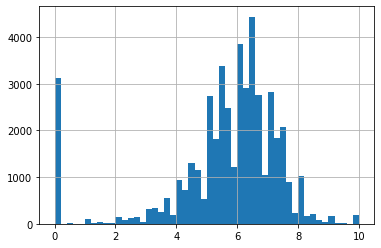

In [23]:
print('Histogram of df[vote_average]')
df['vote_average'].hist(bins=50);

Histogram of df[vote_count]


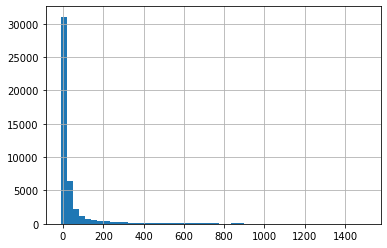

In [27]:
print('Histogram of df[vote_count]')
df['vote_count'].hist(bins=50, range=(-10, 1500));

Histogram of df[popularity]


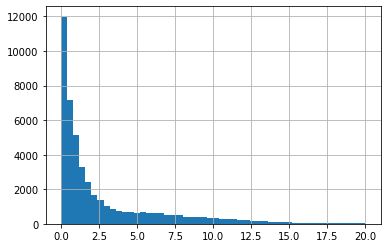

In [42]:
print('Histogram of df[popularity]')
df['popularity'].hist(bins=50, range=(0,20));

Histogram of df[runtime]


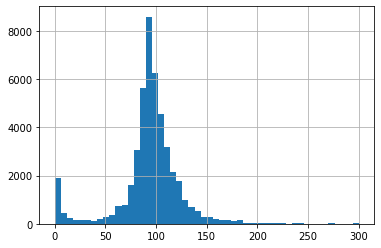

In [30]:
print('Histogram of df[runtime]')
df['runtime'].hist(bins=50, range=(0, 300));

In [35]:
df['genres'].unique

<bound method Series.unique of 0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
46623    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
46624                        [{'id': 18, 'name': 'Drama'}]
46625    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
46626                                                   []
46627                                                   []
Name: genres, Length: 46628, dtype: object>

In [36]:
df['cast'].loc[1]

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [37]:
df['keywords'].loc[1]

'[{\'id\': 10090, \'name\': \'board game\'}, {\'id\': 10941, \'name\': \'disappearance\'}, {\'id\': 15101, \'name\': "based on children\'s book"}, {\'id\': 33467, \'name\': \'new home\'}, {\'id\': 158086, \'name\': \'recluse\'}, {\'id\': 158091, \'name\': \'giant insect\'}]'

In [43]:
df['cast'].loc[1]

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [49]:
df['keywords'].loc[0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

### Creating a weighted rating column

A weighted rating is a value that looks at (1) the rating and (2) the amount of ratings collected. For example the weighted rating will balance the idea that a movie with 1-vote at 5-stars is not better than a movie with 1000-votes at 4.9-stars.

weighted_rating = (num_votes / (num_votes + min_votes) * average_moving_rating) + (min_votes / (num_votes + min_votes) * mean_rating_of_all_movies

weighted_rating = (v / (v+m) * R) + (m / (v+m) * C)

### Ratings

In [39]:
# Load in ratings data
df_ratings = pd.read_csv('data/ratings.csv')

In [40]:
df_ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [42]:
# Filter the ratings list for movies that exist ONLY in the movie dataframe
# This drops the amount of ratings down to about 1/2 !!!
df_ratings = df_ratings[df_ratings['movieId'].isin(df['id'])]
df_ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
...,...,...,...,...
26024269,270896,48780,5.0,1257031830
26024271,270896,49530,4.0,1257034436
26024278,270896,54001,4.0,1257034331
26024280,270896,54503,4.0,1257033886


In [48]:
movies_rated_count = len(df_ratings['movieId'].unique())
movies_rated_count

7565

In [50]:
movies_count = len(df['id'].unique())
movies_count

45432

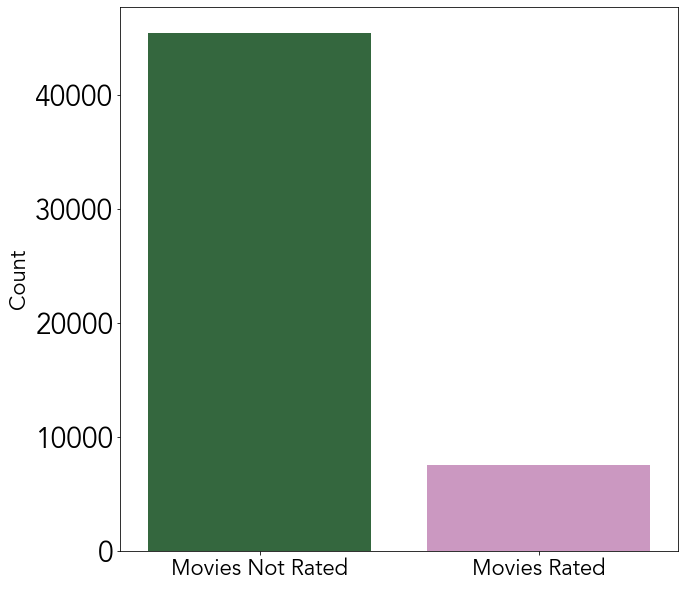

In [125]:
fig2 = plt.figure(figsize=(10,10))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)

# Diagonal Line (Skip Adding Into Legend)
ax2 = sns.barplot(x = ['Movies Not Rated', 'Movies Rated'],
                  y = [movies_count, movies_rated_count],
                  palette = 'cubehelix')

# Axes properties and labels
ax2.set_xlabel('', fontdict=font, fontsize = 22)
ax2.set_ylabel('Count', fontdict=font, fontsize = 22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)

plt.savefig('figures/count_movies_notrated-rated.png', bbox_inches = 'tight', dpi = 300)

In [43]:
df_groupby_ratings = df_ratings.groupby(df_ratings['rating']).count().reset_index()

df_groupby_ratings

,rating,userId,movieId,timestamp
0,0.5,150589,150589,150589
1,1.0,395397,395397,395397
2,1.5,156348,156348,156348
3,2.0,807295,807295,807295
4,2.5,477148,477148,477148
5,3.0,2537226,2537226,2537226
6,3.5,1164543,1164543,1164543
7,4.0,3126537,3126537,3126537
8,4.5,823294,823294,823294
9,5.0,1798191,1798191,1798191


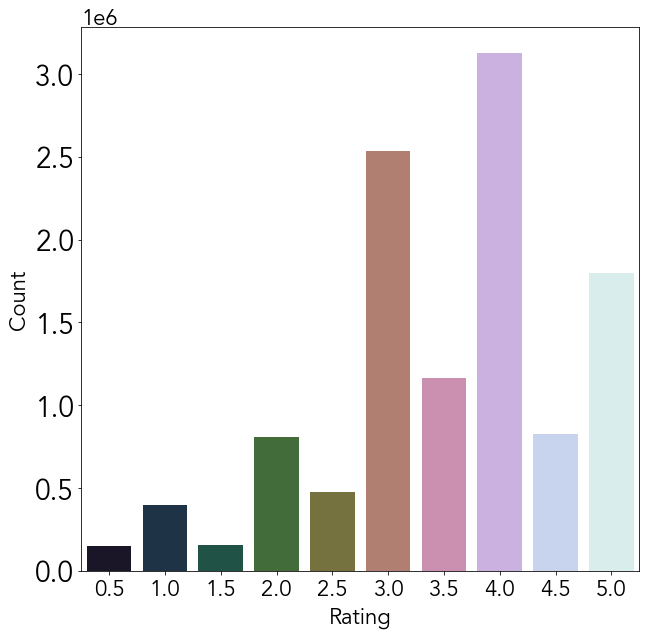

In [124]:
fig1 = plt.figure(figsize=(10, 10))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)

# Diagonal Line (Skip Adding Into Legend)
ax1 = sns.barplot(x = df_groupby_ratings['rating'],
                  y = df_groupby_ratings['userId'],
                  palette = 'cubehelix')

# Axes properties and labels
ax1.set_xlabel('Rating', fontdict=font, fontsize = 22)
ax1.set_ylabel('Count', fontdict=font, fontsize = 22)
# ax1.set_ylabel('Count (x $10^6$)', fontdict=font, fontsize = 22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)
t = ax1.yaxis.get_offset_text()
t.set_size(22)

plt.savefig('figures/user_ratings_distribution.png', bbox_inches = 'tight', dpi = 300)